# *AIML CA1 PART A: CLASSIFICATION*

*Qn. How is your prediction task defined? And what is the meaning of the output variable?*

The task is to build a classification model to predit which customer will have default payment in the next month. So in this case, we will be taking a look mainly at the people who have defaulted payment in order to predit future instances

In this dataset, there are columns such as Gender, Education, Credit Limit as well as Payment history [Bill_amount1, Bill_amount2, Bill_amount3 and Pay_amount1, Pay_amount2, Pay_amount3]

I will be taking these as the features that will be used for prediction.

### importing the required libraries

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from sklearn import metrics

from sklearn.dummy import DummyClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler


from sklearn.model_selection import RandomizedSearchCV

from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score

### Opening and accessing the dataset

In [3]:
data = pd.read_csv('credit_dataset.csv', index_col=0)

Using index_col helps makes the first column (Customer ID) the index. This speeds up the process of feature engineering and feature selection later as now we do not need to drop the column.

### Exploartory data analysis - analysing, exploring and cleaning the data

*Qn. How do you represent your data as features?*

In [4]:
data.head()

,Credit Limit,Gender,Education,Marriage Status,Age,Bill_Amount1,Bill_Amount2,Bill_Amount3,Pay_Amount1,Pay_Amount2,Pay_Amount3,Default payment next month
Customer ID,,,,,,,,,,,,
1,20000,female,univeresity,married,24,3913,3102,689,0,689,0,1
2,120000,female,univeresity,single,26,2682,1725,2682,0,1000,1000,1
3,90000,female,univeresity,single,34,29239,14027,13559,1518,1500,1000,0
4,50000,female,univeresity,married,37,46990,48233,49291,2000,2019,1200,0
5,50000,male,univeresity,married,57,8617,5670,35835,2000,36681,10000,0


### Check for missing values, the info of the data and its statistics

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1600 entries, 1 to 1600
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Credit Limit                1600 non-null   int64 
 1   Gender                      1600 non-null   object
 2   Education                   1600 non-null   object
 3   Marriage Status             1600 non-null   object
 4   Age                         1600 non-null   int64 
 5   Bill_Amount1                1600 non-null   int64 
 6   Bill_Amount2                1600 non-null   int64 
 7   Bill_Amount3                1600 non-null   int64 
 8   Pay_Amount1                 1600 non-null   int64 
 9   Pay_Amount2                 1600 non-null   int64 
 10  Pay_Amount3                 1600 non-null   int64 
 11  Default payment next month  1600 non-null   int64 
dtypes: int64(9), object(3)
memory usage: 162.5+ KB


In [6]:
data.isna().sum()

Credit Limit                  0
Gender                        0
Education                     0
Marriage Status               0
Age                           0
Bill_Amount1                  0
Bill_Amount2                  0
Bill_Amount3                  0
Pay_Amount1                   0
Pay_Amount2                   0
Pay_Amount3                   0
Default payment next month    0
dtype: int64

In [7]:
data.describe()

,Credit Limit,Age,Bill_Amount1,Bill_Amount2,Bill_Amount3,Pay_Amount1,Pay_Amount2,Pay_Amount3,Default payment next month
count,1600.000000,1600.000000,1600.000000,1600.000000,1600.000000,1600.000000,1600.000000,1600.000000,1600.000000
mean,166787.500000,35.224375,49263.408125,47726.644375,44531.051875,5547.646250,5230.494375,4451.610625,0.212500
std,129944.635707,9.404550,72687.106917,71476.217397,67164.064239,14085.471957,15569.605419,12491.715387,0.409205
min,10000.000000,21.000000,-14386.000000,-13543.000000,-9850.000000,0.000000,0.000000,0.000000,0.000000
25%,50000.000000,28.000000,3138.000000,3288.250000,2321.500000,1000.000000,468.500000,226.500000,0.000000
50%,140000.000000,34.000000,20320.500000,19769.500000,19332.500000,2176.500000,1904.000000,1313.500000,0.000000
75%,230000.000000,41.000000,61602.750000,59891.750000,53857.250000,5021.000000,4592.500000,4000.000000,0.000000
max,700000.000000,75.000000,507726.000000,509229.000000,499936.000000,239104.000000,285138.000000,222750.000000,1.000000


From this, we can see that there are no null values that we will have to deal with. However, there are large variataions in some features. For example, in the bill amount columns, the minimum values and the maximum values are very different

### Lets take a look at the number of people who will default next month and the number who wont

In [8]:
# Calculating the percentage of those who defaulted and those who did not
default = data[data['Default payment next month'] == 1].shape[0]
non_default = data[data['Default payment next month'] == 0].shape[0]

# Printing out the percentages
print(default / (default + non_default) * 100, "% of payments that were defaulted")
print(non_default / (default + non_default) * 100, "% of payments that were not defaulted")

21.25 % of payments that were defaulted
78.75 % of payments that were not defaulted


### Visualising the data in respect to whether they defaulted their payment or not

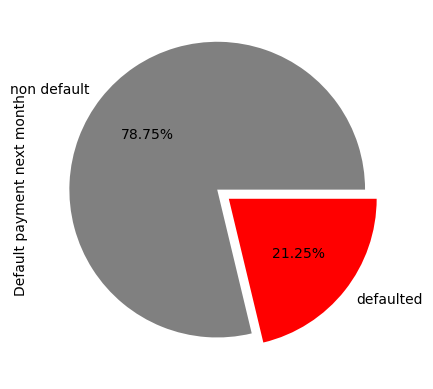

In [9]:
# Visualising the percentage of those who defaulted and those who did not
colors = ['grey','red']
labels = ['non default', 'defaulted']
data['Default payment next month'].value_counts().plot(kind = 'pie',autopct = '%1.2f%%', explode = (0.05, 0.05), labels = labels, colors = colors)
plt.show()

Taking a look at the distribution of people who did not default and did default, we can conclude that the data is imbalanced.

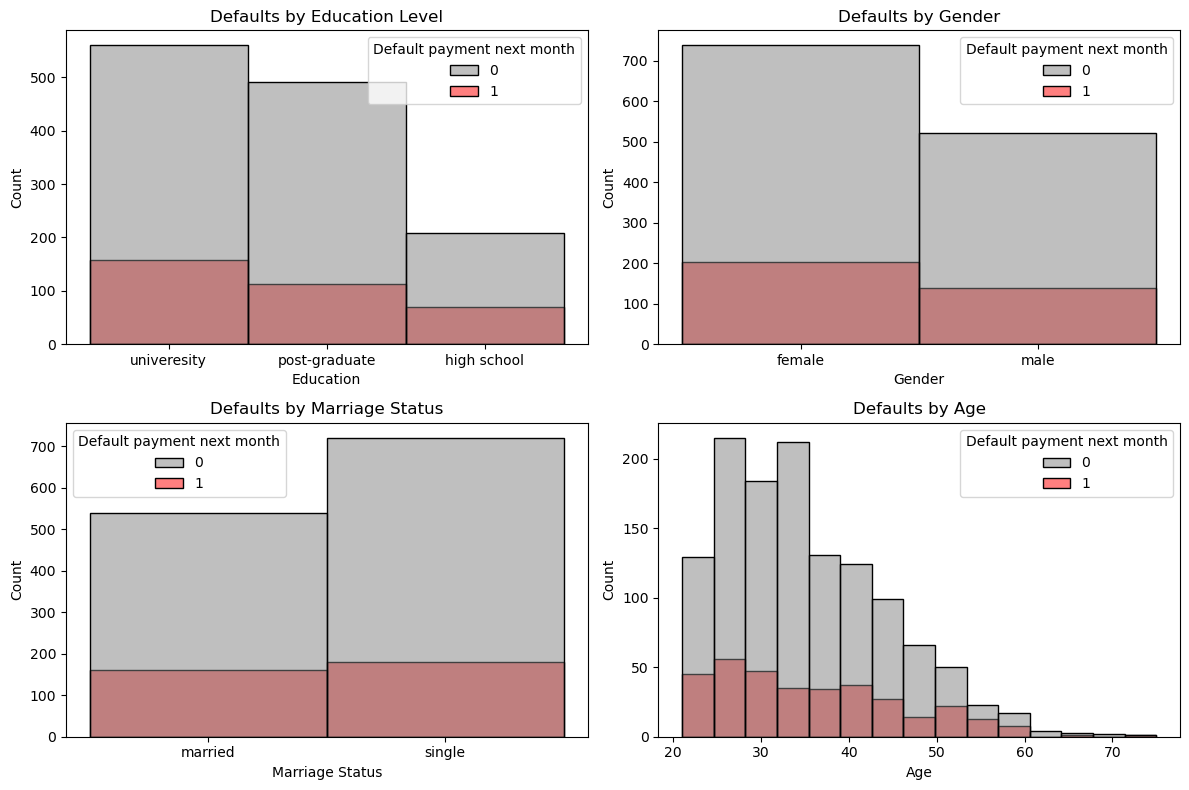

In [10]:
fig, axes = plt.subplots(2, 2, figsize=(12, 8))
colors = ["grey", "red"]

# Visualising the number of defaults by education level
sns.histplot(data=data, x='Education', hue='Default payment next month',palette = colors, ax=axes[0, 0])
axes[0, 0].set_title('Defaults by Education Level')

# Visualising the number of defaults by gender
sns.histplot(data=data, x='Gender', hue='Default payment next month',palette = colors, ax=axes[0, 1])
axes[0, 1].set_title('Defaults by Gender')

# Visualising the number of defaults by marriage status
sns.histplot(data=data, x='Marriage Status', hue='Default payment next month',palette = colors, ax=axes[1, 0])
axes[1, 0].set_title('Defaults by Marriage Status')

# Visualising the number of defaults by age
sns.histplot(data=data, x='Age', hue='Default payment next month',palette = colors, bins=15, ax=axes[1, 1])
axes[1, 1].set_title('Defaults by Age')

plt.tight_layout()
plt.show()


The distribution of the data for those who defaulted and did not do not seem to be affected by the features in the model.


### Finding the correlation between the features by using a heatmap to present the correlation matrix

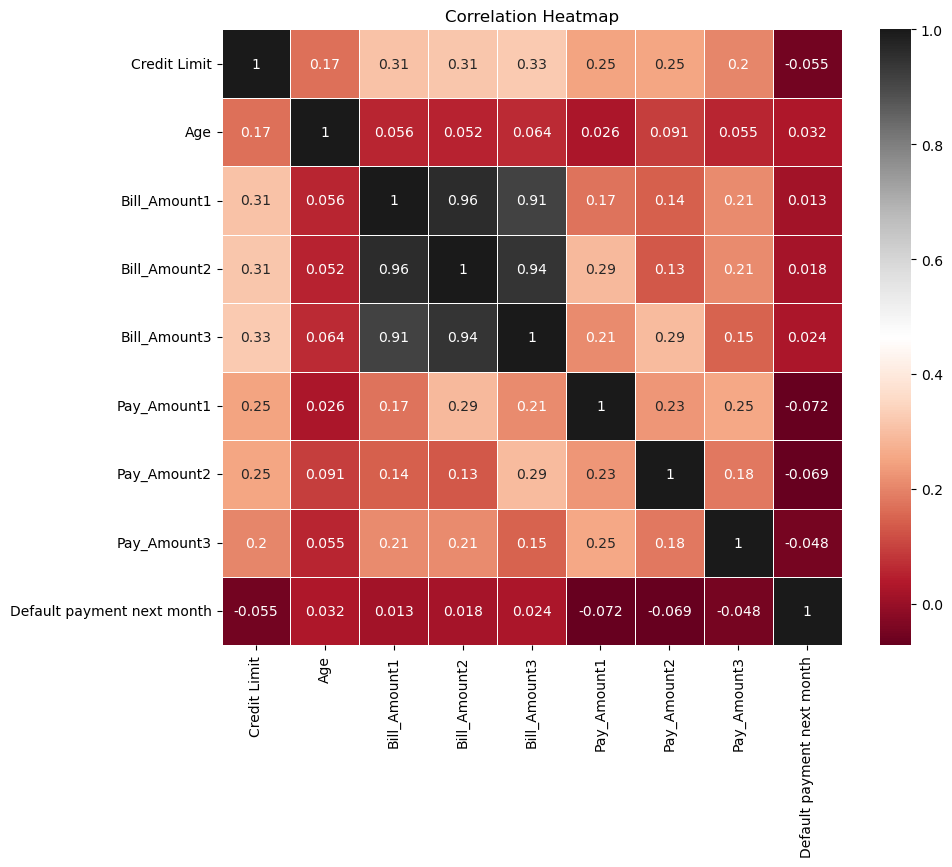

In [11]:
# Computing the correlation matrix
corr_matrix = data.corr()

# Creating a heatmap using Seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='RdGy', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

From this, we can see that there little correlation between the features. 

Aside from Bill_Amount1, Bill_Amount2 and Bill_Amount3 having a very strong positive correlation, we cannot take that as the main features that we will be using for the model.

In my opinion, this means that non of them hold significant importance in calculating the data so it is difficult to drop any of the features here. 

### Feature engineering and feature selection

*Qn. Did you process the features in any way?*

Here I processed the data by creating a new column to help with calculation, encode the categorial data as well as scaling the numerical data.

In [12]:
# Remainder to find out the amouont the customer owes the bank after the 3rd month
data['remainder'] = data['Bill_Amount1'] + data['Bill_Amount2'] + data['Bill_Amount3'] - data['Pay_Amount1'] - data['Pay_Amount2'] - data['Pay_Amount3']

# Percentage of Credit Limit used by every customer
data['percent_CL'] = data['remainder'] / data['Credit Limit']

Here, I created the remainder value to find out what is the outstanding payments for each customer. Then, I calculated the ratio of outstanding payments to their credit limit. 

This could possibly help the model in calculation.

In [13]:
# Perform one-hot encoding
dummies = pd.get_dummies(data[["Gender", "Education", "Marriage Status"]], drop_first=True)

# Concatenate the original data with the encoded dummies
data_enc = pd.concat([data, dummies], axis=1)

# Create a subset to be dropped
to_drop = ["Gender", "Education", "Marriage Status"]

#Drop the data for feature selection
data_enc = data_enc.drop(to_drop, axis = 1)


As some of the values or not numerical, I performed one-hot encoding in order to get all the values to become numerical.

Next, with feature selection, I chose to drop the columns that are no longer needed as we have already encoded them.

### Splitting the data and finding a model

Here, I will apply common classification algorithms to find the algorithm that best suits our model

In [32]:
# Split the data - train and test
x = pd.DataFrame(data_enc.drop("Default payment next month", axis=1).values, columns=data_enc.drop("Default payment next month", axis=1).columns)
y = data_enc["Default payment next month"]
x_train, x_test, y_train, y_test = train_test_split(x, y, stratify = y, test_size = 0.2, random_state=42)


Here I split up the data in order to prevent data leakage and I ensure that the proportion of defaluts to non defaults remains the same of the train and test data. Furthermore, the data split will remain the same throughout.

In [15]:
def evaluate_model(model, x_train, y_train, x_test, y_test):
    # Fit the model to the training data
    model.fit(x_train, y_train)
    
    # Make predictions using the model
    y_pred = model.predict(x_test)
    
    # Calculate the confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    
    # Plot the confusion matrix as a heatmap
    sns.heatmap(cm, annot=True, cmap='Blues')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title('Confusion Matrix')
    plt.show()
    
    # Print the classification report
    print(classification_report(y_test, y_pred))
    
    # Perform cross-validation and get the train and test scores for each fold
    cv_scores_train = cross_val_score(model, x_train, y_train, cv=5, scoring='recall')
    cv_scores_test = cross_val_score(model, x_test, y_test, cv=5, scoring='recall')

    # Calculate the standard deviation of train and test scores
    sd_train = np.std(cv_scores_train)
    sd_test = np.std(cv_scores_test)

    # Plot the train and test scores with shaded region representing standard deviation
    tries = np.arange(1, 6)  # Number of cross-validation folds
    plt.plot(tries, cv_scores_train, label='Train Score')
    plt.plot(tries, cv_scores_test, label='Test Score')

    plt.fill_between(tries, cv_scores_train - sd_train, cv_scores_train + sd_train, alpha=0.3)
    plt.fill_between(tries, cv_scores_test - sd_test, cv_scores_test + sd_test, alpha=0.3)

    plt.xlabel('Number of Tries')
    plt.ylabel('Recall')
    plt.title('Train and Test Scores Over Tries')
    plt.legend()
    plt.show()

    # Obtain predicted probabilities on the test data
    y_pred_prob = model.predict_proba(x_test)[:, 1]

    # Calculate the ROC curve
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

    # Calculate the AUC-ROC score
    auc = roc_auc_score(y_test, y_pred_prob)

    # Plot the ROC curve
    plt.plot(fpr, tpr, label='ROC curve (AUC = {:.2f})'.format(auc))
    plt.plot([0, 1], [0, 1], 'k--', label='Random')

    # Set labels and title
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc='lower right')

    # Show the plot
    plt.show()


This is a simple function to evaluate the model by plotting the confusion matrix, classification report and the ROC curve.

![Alt text](confusion%20matrix.png)

Above is the representation of the confusion matrix which shows us the True Positive, False Positive, True Negative and False Negative.

As for classification report, there is Precision, Recall and the F1 score

Precision = TP / (TP + FP) -- the proportion of correctly predicted positive instances out of all instances predicted as positive

Recall = TP / (TP + FN) --  the proportion of correctly predicted positive instances out of all actual positive instances

F1-score = 2 * (Precision * Recall) / (Precision + Recall) -- a balanced measure of a classifier's performance, considering both precision and recall

*Qn. How do you evaluate the quality of your system?*

I will evaluate the model based on the recall score as it gives me an idea of just how many defaults the model has correctly predicted as a fraction of the total number of defaults

### Baseline model

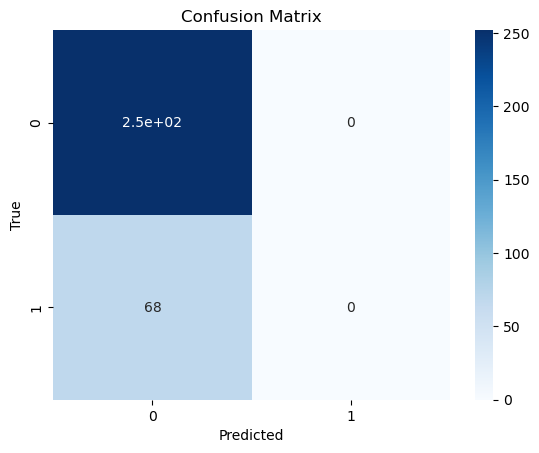

              precision    recall  f1-score   support

           0       0.79      1.00      0.88       252
           1       0.00      0.00      0.00        68

    accuracy                           0.79       320
   macro avg       0.39      0.50      0.44       320
weighted avg       0.62      0.79      0.69       320



c:\Users\3mm3t\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\3mm3t\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\3mm3t\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


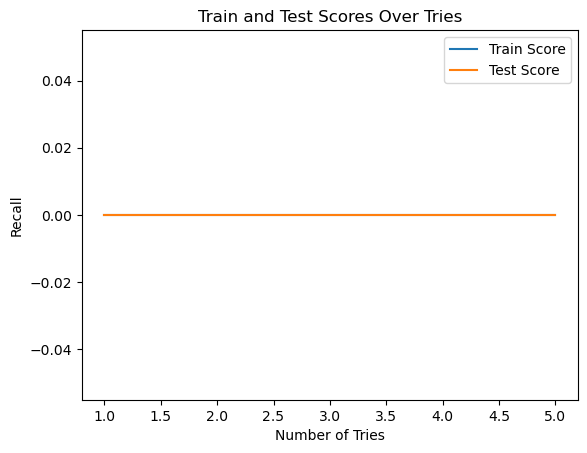

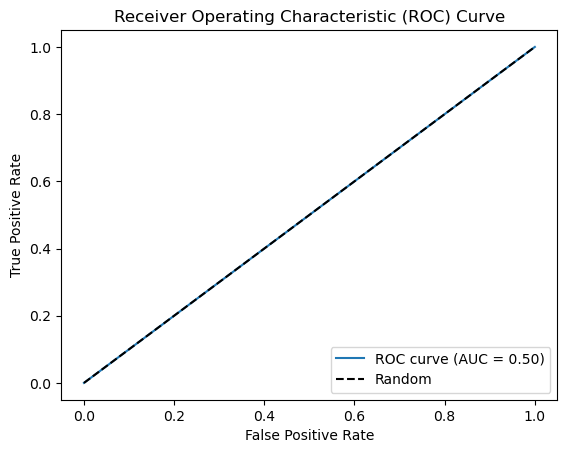

In [16]:
baseline_model = Pipeline([
                ('Standard Scaler', StandardScaler()),
                ('Model', DummyClassifier(strategy='most_frequent'))  
])

evaluate_model(baseline_model, x_train, y_train, x_test, y_test)


I will use this dummy classifier as a benchmark to compare the selected models. 

I will be looking for classifiers that score better then this models as it is essentially guessing.

The classifer predicts the most frequent cases so this means that it will guess that everyone does not default (which is why it is equal to the percentage shown in the pie chart at the start).

*Qn. How did you select which learning algorithms to use?*

As the data is imbalanced, I will impliment some of the models that commonly used for imbalanced datasets. 
- Random Forest -- Extra Trees
- Gradient Boosting -- Gradient Boosting Classifier
- Nearest Neighbors -- K Nearest Neighbors



### Extra Trees

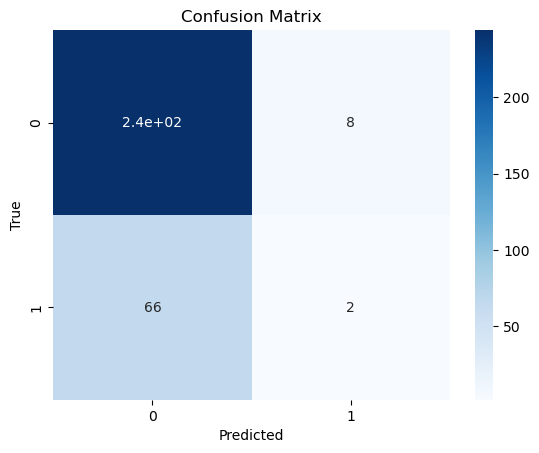

              precision    recall  f1-score   support

           0       0.79      0.97      0.87       252
           1       0.20      0.03      0.05        68

    accuracy                           0.77       320
   macro avg       0.49      0.50      0.46       320
weighted avg       0.66      0.77      0.69       320



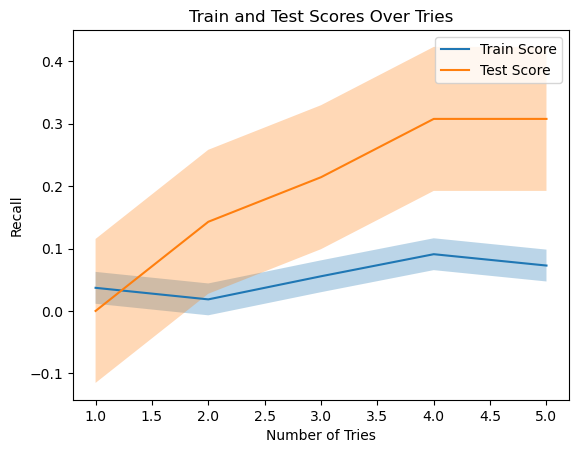

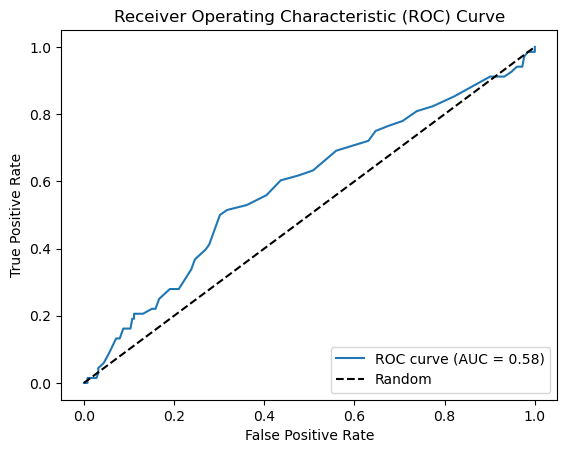

In [17]:
extratrees = Pipeline([
                ('Standard Scaler', StandardScaler()),
                ('Model', ExtraTreesClassifier())  
])

evaluate_model(extratrees, x_train, y_train, x_test, y_test)

### Gradient Boosting

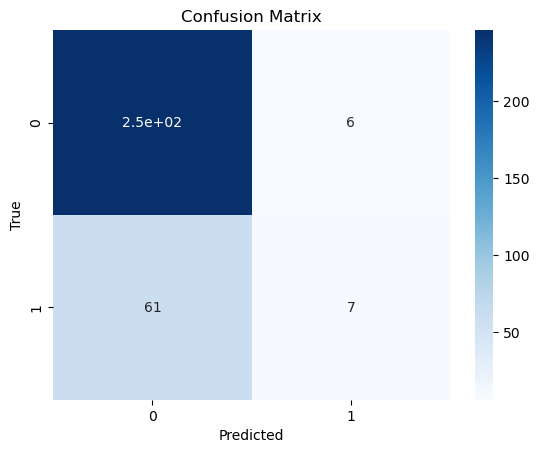

              precision    recall  f1-score   support

           0       0.80      0.98      0.88       252
           1       0.54      0.10      0.17        68

    accuracy                           0.79       320
   macro avg       0.67      0.54      0.53       320
weighted avg       0.75      0.79      0.73       320



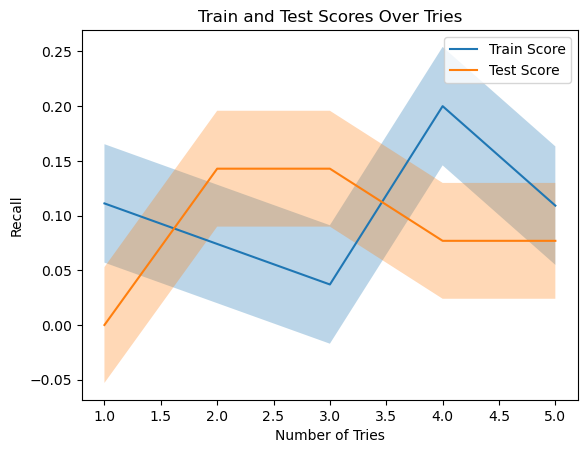

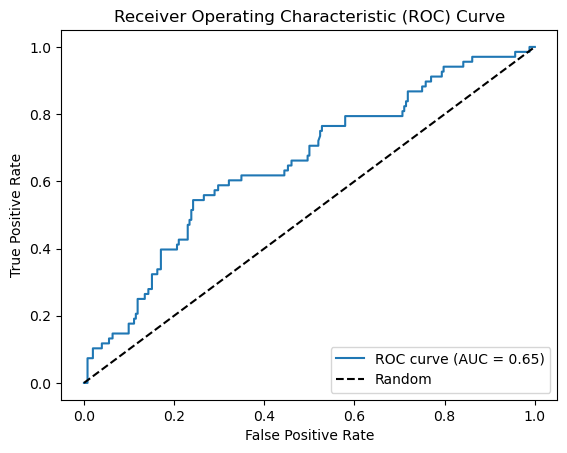

In [18]:
gradientboosting = Pipeline([
                ('Standard Scaler', StandardScaler()),
                ('Model', GradientBoostingClassifier())  
])

evaluate_model(gradientboosting, x_train, y_train, x_test, y_test)

### K Nearest Neighbours

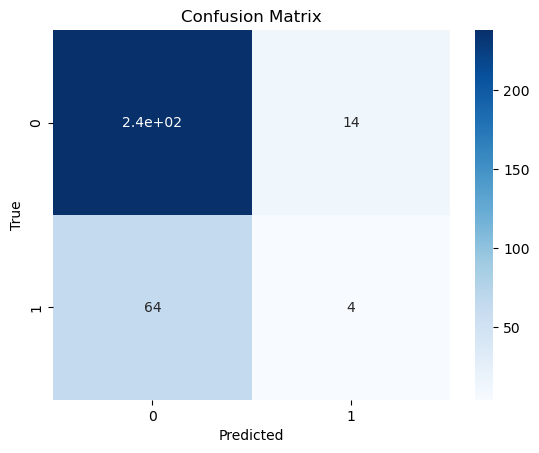

              precision    recall  f1-score   support

           0       0.79      0.94      0.86       252
           1       0.22      0.06      0.09        68

    accuracy                           0.76       320
   macro avg       0.51      0.50      0.48       320
weighted avg       0.67      0.76      0.70       320



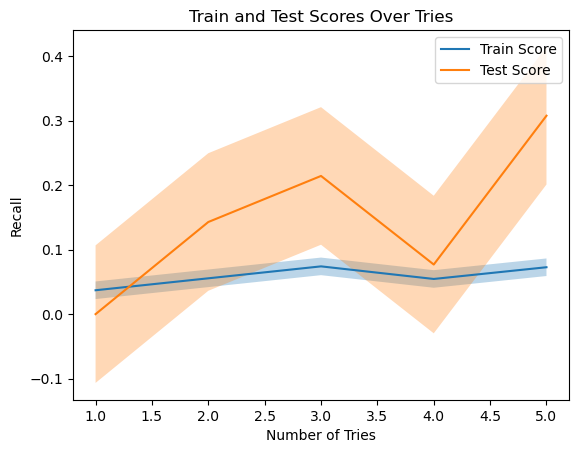

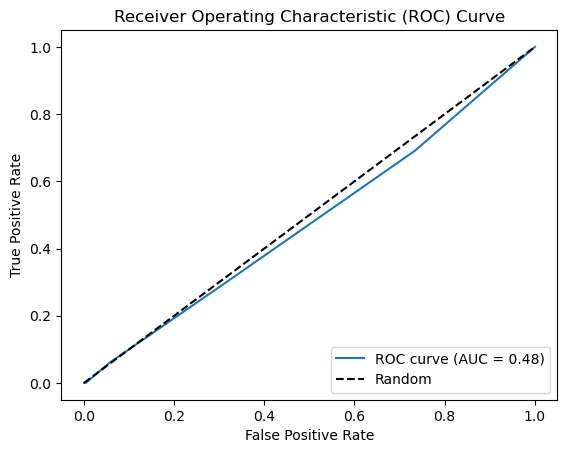

In [19]:
knn = Pipeline([
                ('Standard Scaler', StandardScaler()),
                ('Model', KNeighborsClassifier())  
])

evaluate_model(knn, x_train, y_train, x_test, y_test)

*Qn. Can you say anything about the errors that the system makes?*

The error made by the model could be a result of the lack of a significant difference between those who defaulted and those who did not.

It could also be because that there is not as much data on those who defaulted

*Qn. How well does your system compare to a dummy baseline?*

From the evaluations of the models, Gradient boosting has shown the best performance for getting the number of people who defaulted right. It has predicted 7 of the defaults correctly which is definitely better than our dummy model. However, it is not very good at predicting it. As such, i will be tuning this model

*Qn. Did you try to tune the hyperparameters of the learning algorithm, and in that case how?*

Taking into consideration the different parameters of the gradient boosting classifier, I selected a few values for the random search to do a cross validation through and present the best set of parameters with a scoring method of Recall

In [20]:
# Define the parameter grid
gradboosting_params = {
    'n_estimators': [100,200,300],
    'max_depth': [3,4,5],
    'min_samples_split': [2,3,4,5,6],
    'min_samples_leaf': [2,3,4]
}

# Create an instance of the model
model = GradientBoostingClassifier()


# Create an instance of RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=model,
    param_distributions=gradboosting_params,
    n_iter=10,
    scoring='precision',
    cv=5,
    random_state=42
)

# Fit the RandomizedSearchCV to the data
random_search.fit(x_train, y_train)

# Creating a variable to store the best parameters 
best_params = random_search.best_params_

# Print the best parameters and score
print("Best Parameters:", random_search.best_params_)
print("Best Score:", random_search.best_score_)

Best Parameters: {'n_estimators': 100, 'min_samples_split': 6, 'min_samples_leaf': 4, 'max_depth': 3}
Best Score: 0.4799603174603175


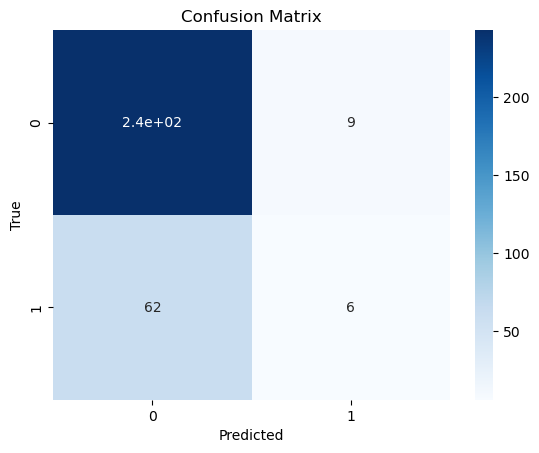

              precision    recall  f1-score   support

           0       0.80      0.96      0.87       252
           1       0.40      0.09      0.14        68

    accuracy                           0.78       320
   macro avg       0.60      0.53      0.51       320
weighted avg       0.71      0.78      0.72       320



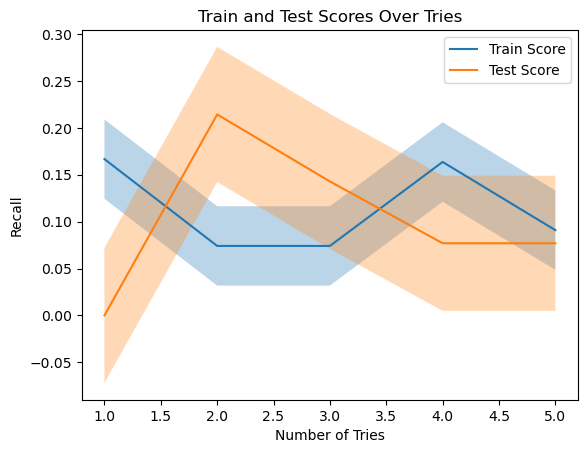

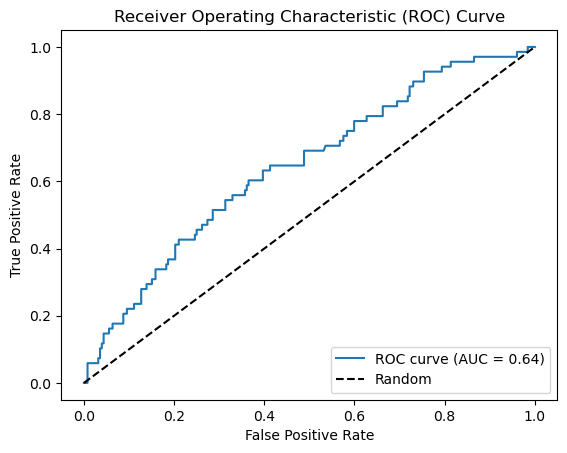

In [21]:
best_model = Pipeline([
    ('Standard Scaler', StandardScaler()),
    ('Model', GradientBoostingClassifier(**best_params))
])

evaluate_model(best_model, x_train, y_train, x_test, y_test)


   Credit Limit       Age  Bill_Amount1  Bill_Amount2  Bill_Amount3  \
0      0.031422  0.096037      0.138805      0.063832      0.141357   

   Pay_Amount1  Pay_Amount2  Pay_Amount3  remainder  percent_CL  Gender_male  \
0     0.118725     0.101856     0.087912   0.079033    0.126187      0.00755   

   Education_post-graduate  Education_univeresity  Marriage Status_single  
0                 0.002406                    0.0                0.004877  


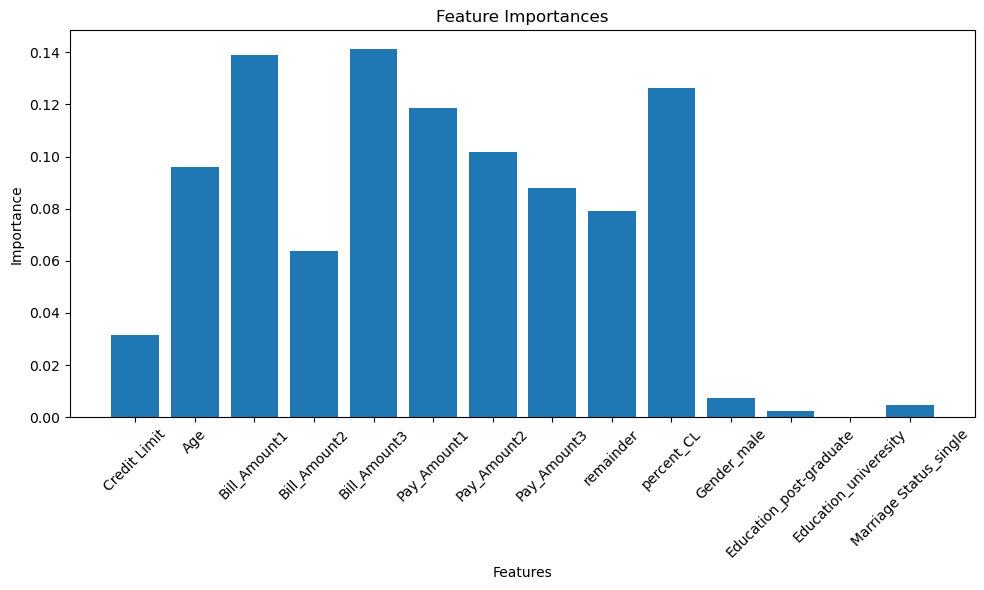

In [34]:
# Get feature importances
importances = pd.DataFrame(best_model.named_steps['Model'].feature_importances_.reshape(1,-1), columns=x.columns)
print(importances)

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.bar(importances.columns, importances.values.flatten())
plt.xticks(rotation=45)
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importances')
plt.tight_layout()
plt.show()



*Qn. Is it possible to say something about which features the model considers important?*

Based on the graph which shows the importance of the features, there seems to be a wide spread of what the model takes into consideration. In particular, the first bill amount and the third bill amount, along with percent_CL have the highest importance in the model despite the fact that the importance ratio is already so low.

It is difficult to say that those are the only features that we should take into consideration as we will miss out on very valuable data for our model. 

As we can see from the evauations of the models after doing hyperparamter tuning, the model showed little improvement. This could be a result of the data being imbalanced. In order to tackle this issue, I will be applying a simple oversampler to get the number of defaults and non defaults to be the same.

### Performing oversampling

In [ ]:
from imblearn.over_sampling import RandomOverSampler
import numpy as np

# Create an instance of RandomOverSampler
oversampler = RandomOverSampler(random_state=42)

# Apply random oversampling to your data
x_resampled, y_resampled = oversampler.fit_resample(x, y)

# Check the class distribution before and after oversampling
print("Before oversampling:")
print(np.bincount(y))

print("After oversampling:")
print(np.bincount(y_resampled))


Before oversampling:
[1260  340]
After oversampling:
[1260 1260]


Now i split the newly oversampled data in order to prevent data leakavge for the testing and evaulation of the model

In [ ]:
# Split the data - train and test
x = data_enc.drop("Default payment next month", axis=1)
y = data_enc["Default payment next month"]
x_res_train, x_res_test, y_res_train, y_res_test = train_test_split(x_resampled, y_resampled, stratify = y_resampled, test_size = 0.2)

Now i re evaluate the baseline model so that we can properly guage the model we will be using.

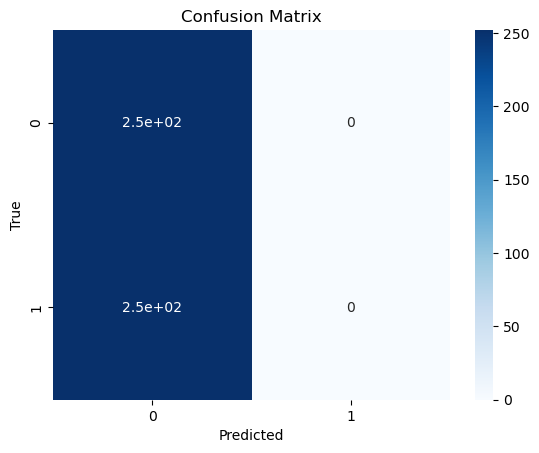

              precision    recall  f1-score   support

           0       0.50      1.00      0.67       252
           1       0.00      0.00      0.00       252

    accuracy                           0.50       504
   macro avg       0.25      0.50      0.33       504
weighted avg       0.25      0.50      0.33       504



c:\Users\3mm3t\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\3mm3t\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\3mm3t\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


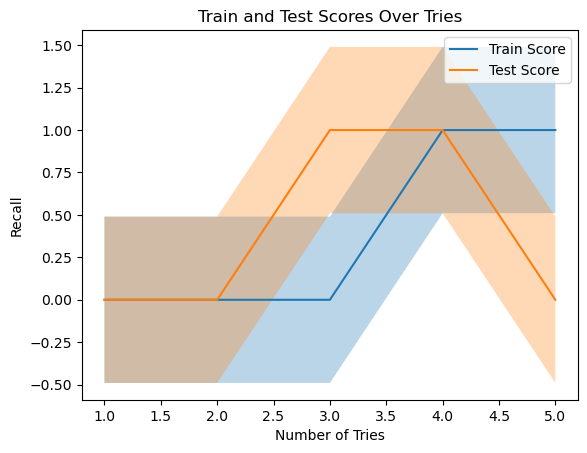

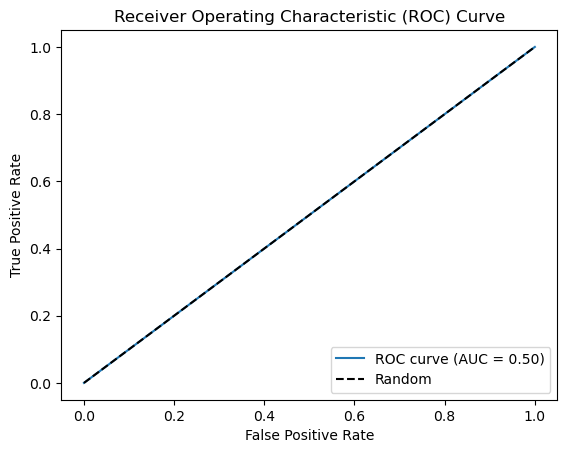

In [ ]:
baseline_model = Pipeline([
    ('Standard Scaler', StandardScaler()),
    ('Model', DummyClassifier())
])

evaluate_model(baseline_model, x_res_train, y_res_train, x_res_test, y_res_test)


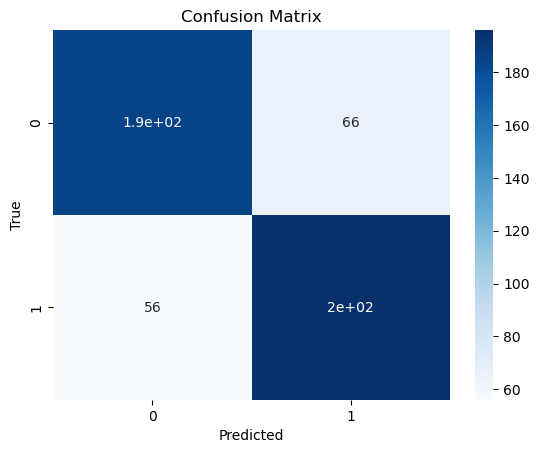

              precision    recall  f1-score   support

           0       0.77      0.74      0.75       252
           1       0.75      0.78      0.76       252

    accuracy                           0.76       504
   macro avg       0.76      0.76      0.76       504
weighted avg       0.76      0.76      0.76       504



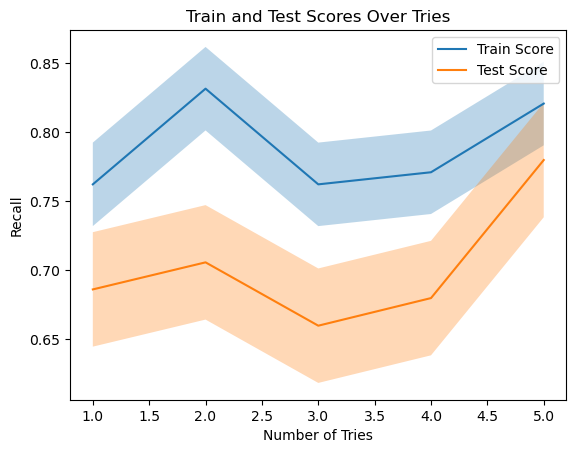

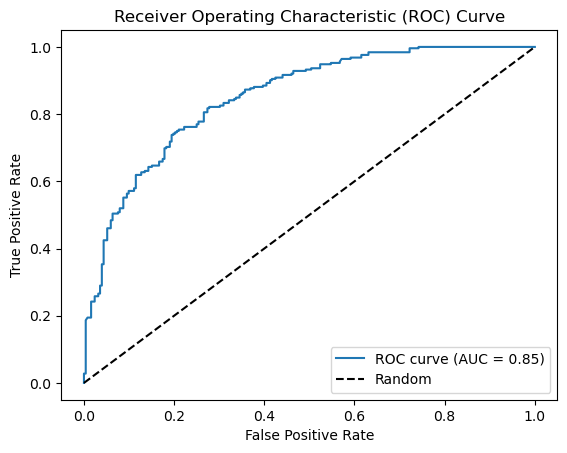

In [ ]:
gradientboosting = Pipeline([
                ('Standard Scaler', StandardScaler()),
                ('Model', GradientBoostingClassifier())  
])

evaluate_model(gradientboosting, x_res_train, y_res_train, x_res_test, y_res_test)

As we can see, the model now performs better at classifing the customers that defaul payments

In [ ]:
# Define the parameter grid
gradboosting_params = {
    'n_estimators': [100,200,300],
    'max_depth': [3,4,5],
    'min_samples_split': [2,3,4],
    'min_samples_leaf': [2,3,4]
}

# Create an instance of the model
model = GradientBoostingClassifier()


# Create an instance of RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=model,
    param_distributions=gradboosting_params,
    n_iter=10,
    scoring='precision',
    cv=5,
    random_state=42
)

# Fit the RandomizedSearchCV to the data
random_search.fit(x_resampled, y_resampled)

# Creating a variable to store the best parameters 
best_params = random_search.best_params_

# Print the best parameters and score
print("Best Parameters:", random_search.best_params_)
print("Best Score:", random_search.best_score_)


Best Parameters: {'n_estimators': 200, 'min_samples_split': 4, 'min_samples_leaf': 3, 'max_depth': 5}
Best Score: 0.8535727002404613


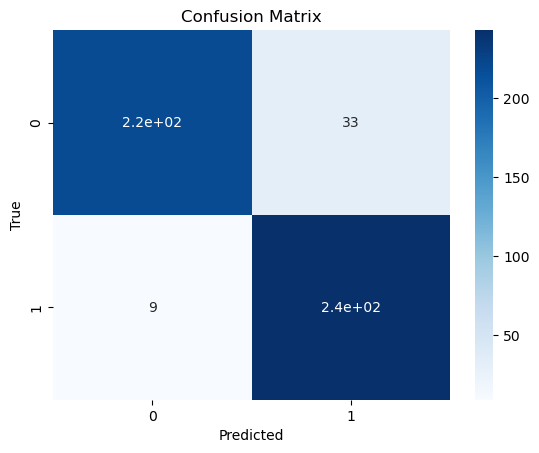

              precision    recall  f1-score   support

           0       0.96      0.87      0.91       252
           1       0.88      0.96      0.92       252

    accuracy                           0.92       504
   macro avg       0.92      0.92      0.92       504
weighted avg       0.92      0.92      0.92       504



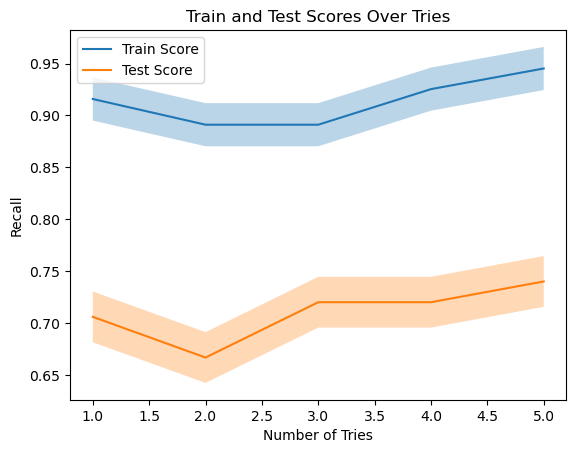

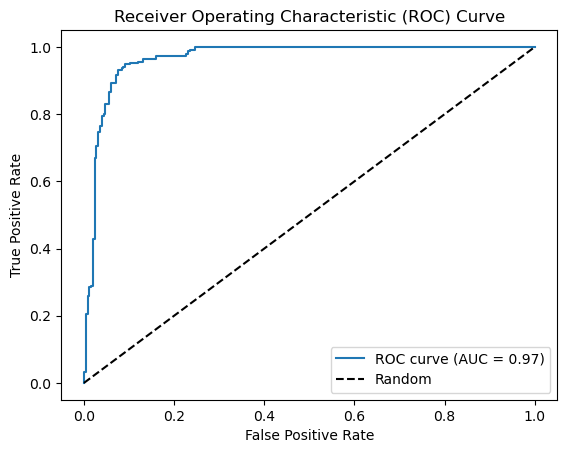

In [ ]:
best_model = Pipeline([
    ('Standard Scaler', StandardScaler()),
    ('Model', GradientBoostingClassifier(**best_params))
])

evaluate_model(best_model, x_res_train, y_res_train, x_res_test, y_res_test)